# Table of Contents
01. Import Libraries and Data
02. Data Cleaning
03. Plotting a Choropleth

## 01. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
%matplotlib inline

In [3]:
#define path
path = r'C:\Users\legra\Desktop\08-2022 Airline Delays Analysis'

In [4]:
#import data
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'airline_delay_wrangled2.csv'), index_col = False)

In [5]:
#checking output 
df.head()

,year,month,carrier,carrier_name,airport name,code,city,state,arriving_flight_count,arrival_delayed_15_minutes_more,...,security_delay_count,late_aircraft_count,arrival_cancelled_count,arrival_diverted_count,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes
0,2021,12,9E,Endeavor Air Inc.,Lehigh Valley International,ABE,Allentown/Bethlehem/Easton,PA,127,9.0,...,0.0,2.95,0,0,264,119,0,68,0,77
1,2021,12,9E,Endeavor Air Inc.,Southwest Georgia Regional,ABY,Albany,GA,73,11.0,...,0.0,1.87,0,0,342,125,0,142,0,75
2,2021,12,9E,Endeavor Air Inc.,Alexandria International,AEX,Alexandria,LA,62,8.0,...,0.0,1.15,0,0,439,156,0,103,0,180
3,2021,12,9E,Endeavor Air Inc.,Augusta Regional at Bush Field,AGS,Augusta,GA,166,18.0,...,0.0,2.74,0,1,1266,291,693,167,0,115
4,2021,12,9E,Endeavor Air Inc.,Albany International,ALB,Albany,NY,52,6.0,...,0.0,0.82,0,0,497,278,180,21,0,18


In [6]:
df.shape

(38701, 23)

In [7]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport name', 'code',
       'city', 'state', 'arriving_flight_count',
       'arrival_delayed_15_minutes_more', 'carrier_delay_count',
       'weather_delay_count', 'nas_delay_count', 'security_delay_count',
       'late_aircraft_count', 'arrival_cancelled_count',
       'arrival_diverted_count', 'arrival_delay_minutes',
       'carrier_delay_minutes', 'weather_delay_minutes', 'nas_delay_minutes',
       'security_delay_minutes', 'late_aircraft_delay_minutes'],
      dtype='object')

In [8]:
#import us states json
country_geo = r'C:\Users\legra\Desktop\08-2022 Airline Delays Analysis\Data\Original Data\us-states.json'

In [9]:
f = open(r'C:\Users\legra\Desktop\08-2022 Airline Delays Analysis\Data\Original Data\us-states.json',)
  
# returns JSON object as a dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

## 02. Data Cleaning

In [10]:
#check for missing values 
df.isnull().sum()

year                                 0
month                                0
carrier                              0
carrier_name                         0
airport name                         0
code                                 0
city                                 0
state                                0
arriving_flight_count                0
arrival_delayed_15_minutes_more    173
carrier_delay_count                  0
weather_delay_count                  0
nas_delay_count                      0
security_delay_count                 0
late_aircraft_count                  0
arrival_cancelled_count              0
arrival_diverted_count               0
arrival_delay_minutes                0
carrier_delay_minutes                0
weather_delay_minutes                0
nas_delay_minutes                    0
security_delay_minutes               0
late_aircraft_delay_minutes          0
dtype: int64

Missing values are actually instances where no flghts were delayed

<AxesSubplot:xlabel='arrival_delayed_15_minutes_more', ylabel='Count'>

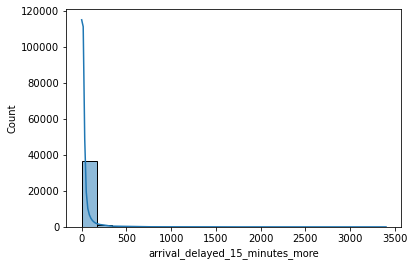

In [11]:
#check for extreme values in arrival delay 15 minutes
sns.histplot(df['arrival_delayed_15_minutes_more'], bins=20, kde = True)

In [12]:
df[df['arrival_delayed_15_minutes_more'] >3500]

,year,month,carrier,carrier_name,airport name,code,city,state,arriving_flight_count,arrival_delayed_15_minutes_more,...,security_delay_count,late_aircraft_count,arrival_cancelled_count,arrival_diverted_count,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes


In [13]:
#rename column
df.rename(columns = {'state' : 'state_code'}, inplace = True)

In [14]:
#Define a new variable

result = []

for value in df['state_code']:
  if value == ' AL':
    result.append('Alabama')
  elif value == ' AK':
    result.append('Alaska')
  elif value == ' AZ':
    result.append('Arizona')  
  elif value == ' AR':
    result.append('Arkansas')  
  elif value == ' CA':
    result.append('California')  
  elif value == ' CO':
    result.append('Colorado')
  elif value == ' CT':
    result.append('Connecticut')  
  elif value == ' DE':
    result.append('Delaware')  
  elif value == ' FL':
    result.append('Florida')    
  elif value == ' GA':
    result.append('Georgia')
  elif value == ' HI':
    result.append('Hawaii')  
  elif value == ' ID':
    result.append('Idaho')  
  elif value == ' IL':
    result.append('Illinois')  
  elif value == ' IN':
    result.append('Indiana')   
  elif value == ' IA':
    result.append('Iowa')
  elif value == ' KS':
    result.append('Kansas')  
  elif value == ' KY':
    result.append('Kentucky')  
  elif value == ' LA':
    result.append('Louisiana')    
  elif value == ' ME':
    result.append('Maine')
  elif value == ' MD':
    result.append('Maryland')  
  elif value == ' MA':
    result.append('Massachusetts')  
  elif value == ' MI':
    result.append('Michigan')  
  elif value == ' MN':
    result.append('Minnesota')
  elif value == ' MS':
    result.append('Mississippi')  
  elif value == ' MO':
    result.append('Missouri')  
  elif value == ' MT':
    result.append('Montana')    
  elif value == ' NE':
    result.append('Nebraska')
  elif value == ' NV':
    result.append('Nevada')  
  elif value == ' NH':
    result.append('New Hampshire')  
  elif value == ' NJ':
    result.append('New Jersey')  
  elif value == ' NM':
    result.append('New Mexico')
  elif value == ' NY':
    result.append('New York')  
  elif value == ' NC':
    result.append('North Carolina')  
  elif value == ' ND':
    result.append('North Dakota')   
  elif value == ' OH':
    result.append('Ohio')    
  elif value == ' OK':
    result.append('Oklahoma')
  elif value == ' OR':
    result.append('Oregon')  
  elif value == ' PA':
    result.append('Pennsylvania')  
  elif value == ' RI':
    result.append('Rhode Island')  
  elif value == ' SC':
    result.append('South Carolina')
  elif value == ' SD':
    result.append('South Dakota')  
  elif value == ' TN':
    result.append('Tennessee')  
  elif value == ' TX':
    result.append('Texas') 
  elif value == ' UT':
    result.append('Utah')  
  elif value == ' VT':
    result.append('Vermont')
  elif value == ' VA':
    result.append('Virginia')  
  elif value == ' WA':
    result.append('Washington')  
  elif value == ' WV':
    result.append('West Virginia')   
  elif value == ' WI':
    result.append('Wisconsin')    
  elif value == ' WY':
    result.append('Wyoming')  
  elif value == ' DC':
    result.append('Washington, DC')  
  elif value == ' PR':
    result.append('Puerto Rico')  
  elif value == ' VI':
    result.append('Virgin Islands')      
  else:
    result.append('unknown')



In [15]:
result

['Pennsylvania',
 'Georgia',
 'Louisiana',
 'Georgia',
 'New York',
 'Georgia',
 'Wisconsin',
 'Texas',
 'North Carolina',
 'Michigan',
 'New York',
 'Maine',
 'Alabama',
 'North Dakota',
 'Illinois',
 'Tennessee',
 'Massachusetts',
 'Georgia',
 'Louisiana',
 'Vermont',
 'New York',
 'Maryland',
 'South Carolina',
 'Tennessee',
 'Virginia',
 'South Carolina',
 'Iowa',
 'Ohio',
 'North Carolina',
 'Ohio',
 'West Virginia',
 'Georgia',
 'Ohio',
 'Wisconsin',
 'Ohio',
 'Washington, DC',
 'Texas',
 'Alabama',
 'Minnesota',
 'Iowa',
 'Michigan',
 'Florida',
 'Indiana',
 'New Jersey',
 'Florida',
 'North Dakota',
 'South Dakota',
 'Indiana',
 'North Dakota',
 'Florida',
 'Mississippi',
 'Wisconsin',
 'Michigan',
 'North Carolina',
 'South Carolina',
 'Mississippi',
 'New York',
 'Alabama',
 'Washington, DC',
 'Kansas',
 'North Carolina',
 'Indiana',
 'New York',
 'Mississippi',
 'New York',
 'Michigan',
 'Kentucky',
 'Louisiana',
 'New York',
 'Michigan',
 'Pennsylvania',
 'Illinois',
 'Tenn

In [16]:
#creating new column
df['state'] = result

In [17]:
#checking ouput
df.head()

,year,month,carrier,carrier_name,airport name,code,city,state_code,arriving_flight_count,arrival_delayed_15_minutes_more,...,late_aircraft_count,arrival_cancelled_count,arrival_diverted_count,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes,state
0,2021,12,9E,Endeavor Air Inc.,Lehigh Valley International,ABE,Allentown/Bethlehem/Easton,PA,127,9.0,...,2.95,0,0,264,119,0,68,0,77,Pennsylvania
1,2021,12,9E,Endeavor Air Inc.,Southwest Georgia Regional,ABY,Albany,GA,73,11.0,...,1.87,0,0,342,125,0,142,0,75,Georgia
2,2021,12,9E,Endeavor Air Inc.,Alexandria International,AEX,Alexandria,LA,62,8.0,...,1.15,0,0,439,156,0,103,0,180,Louisiana
3,2021,12,9E,Endeavor Air Inc.,Augusta Regional at Bush Field,AGS,Augusta,GA,166,18.0,...,2.74,0,1,1266,291,693,167,0,115,Georgia
4,2021,12,9E,Endeavor Air Inc.,Albany International,ALB,Albany,NY,52,6.0,...,0.82,0,0,497,278,180,21,0,18,New York


In [18]:
df['state'].value_counts()

Florida           3049
California        2937
Texas             2779
New York          1823
North Carolina    1298
Michigan          1249
Ohio              1226
Pennsylvania      1160
Tennessee         1066
South Carolina     944
Illinois           903
Louisiana          892
Colorado           889
Wisconsin          851
Missouri           840
Georgia            806
Virginia           805
Montana            798
Washington         638
Indiana            638
Arizona            635
Alaska             605
Hawaii             602
Oklahoma           599
Alabama            583
Minnesota          579
Iowa               564
Washington, DC     560
Oregon             532
Nevada             530
Arkansas           496
North Dakota       481
Nebraska           460
Kentucky           449
South Dakota       406
Kansas             401
Utah               387
Massachusetts      385
Idaho              380
New Mexico         358
Maryland           335
Maine              328
Mississippi        326
New Jersey 

In [19]:
#create subset to check unkown states

df_sub = df[df['state']== 'unknown']

In [20]:
df_sub.head(56)

,year,month,carrier,carrier_name,airport name,code,city,state_code,arriving_flight_count,arrival_delayed_15_minutes_more,...,late_aircraft_count,arrival_cancelled_count,arrival_diverted_count,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes,state
722,2021,12,HA,Hawaiian Airlines Inc.,Pago Pago International,PPG,Pago Pago,TT,1,1.0,...,0.00,0,0,45,45,0,0,0,0,unknown
1344,2021,12,UA,United Air Lines Inc.,Guam International,GUM,Guam,TT,62,7.0,...,2.03,0,0,450,240,0,6,0,204,unknown
1402,2021,12,UA,United Air Lines Inc.,Francisco C. Ada Saipan International,SPN,Saipan,TT,31,1.0,...,0.00,0,0,185,185,0,0,0,0,unknown
2425,2021,11,HA,Hawaiian Airlines Inc.,Pago Pago International,PPG,Pago Pago,TT,2,2.0,...,0.00,0,0,228,228,0,0,0,0,unknown
3060,2021,11,UA,United Air Lines Inc.,Guam International,GUM,Guam,TT,60,4.0,...,4.00,1,0,105,0,0,0,0,105,unknown
3119,2021,11,UA,United Air Lines Inc.,Francisco C. Ada Saipan International,SPN,Saipan,TT,30,3.0,...,0.00,0,0,176,176,0,0,0,0,unknown
4143,2021,10,HA,Hawaiian Airlines Inc.,Pago Pago International,PPG,Pago Pago,TT,1,1.0,...,0.00,0,0,18,18,0,0,0,0,unknown
4780,2021,10,UA,United Air Lines Inc.,Guam International,GUM,Guam,TT,62,9.0,...,3.80,0,0,313,134,0,73,0,106,unknown
4841,2021,10,UA,United Air Lines Inc.,Francisco C. Ada Saipan International,SPN,Saipan,TT,31,1.0,...,0.00,0,0,16,0,0,16,0,0,unknown
5901,2021,9,HA,Hawaiian Airlines Inc.,Pago Pago International,PPG,Pago Pago,TT,2,1.0,...,0.00,0,0,25,25,0,0,0,0,unknown


In [21]:
#export df
df.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'wrangled_v3.csv'))

In [22]:
#aggregate data to get state totals of how many flights were delayed 15 minutes or more
df.groupby('state')['arrival_delayed_15_minutes_more'].sum()

state
Alabama             7582.0
Alaska             11053.0
Arizona            44233.0
Arkansas            5488.0
California        136448.0
Colorado           76325.0
Connecticut         6012.0
Delaware              27.0
Florida           155934.0
Georgia            60571.0
Hawaii             17133.0
Idaho               6935.0
Illinois           74452.0
Indiana            13133.0
Iowa                6143.0
Kansas              3480.0
Kentucky            6609.0
Louisiana          14748.0
Maine               3188.0
Maryland           17727.0
Massachusetts      21764.0
Michigan           33987.0
Minnesota          23037.0
Mississippi         2795.0
Missouri           23716.0
Montana             7205.0
Nebraska            6459.0
Nevada             42337.0
New Hampshire       1599.0
New Jersey         28977.0
New Mexico          5792.0
New York           55292.0
North Carolina     59082.0
North Dakota        4113.0
Ohio               29701.0
Oklahoma            9647.0
Oregon             171

In [23]:
#create df for state totals
lst = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 
       'South Dakota', 'Tennessee', 'Texas', 'Utah',  'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'Washington, DC', 'West Virginia', 'Wisconsin', 'Wyoming', 'unknown']
lst2 = [7582, 11053, 44233, 5488, 136448, 76325, 6012, 27, 155934, 60571, 17133, 6935, 74452, 13133, 6143, 3480, 6609, 14748, 3188, 17727, 21764, 33987, 23037, 2795, 
        23716, 7205, 6459, 42337, 1599, 28977, 5792, 55292, 59082, 4113, 29701, 9647, 17127, 32491, 10168, 3012, 14512, 3870, 28637, 185573, 25727, 1155, 1737, 10114, 
        39822, 29495, 1365, 11427, 3116, 181]
#create df
df_state_total_delays = pd.DataFrame(list(zip(lst,lst2)),
                                     columns =['state', 'total_delays'])

df_state_total_delays

,state,total_delays
0,Alabama,7582
1,Alaska,11053
2,Arizona,44233
3,Arkansas,5488
4,California,136448
5,Colorado,76325
6,Connecticut,6012
7,Delaware,27
8,Florida,155934
9,Georgia,60571


In [24]:
#export df
df_state_total_delays.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'state_total_delays.csv'))

<AxesSubplot:xlabel='total_delays', ylabel='Count'>

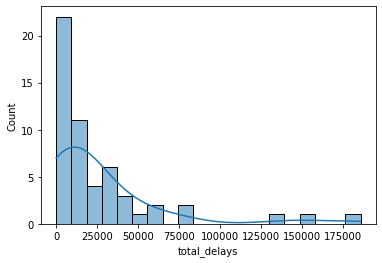

In [25]:
#check for extreme values in total delays
sns.histplot(df_state_total_delays['total_delays'], bins=20, kde = True)

In [26]:
#aggregate data to get state totals of delay minutes
df.groupby('state')['arrival_delay_minutes',
       'carrier_delay_minutes', 'weather_delay_minutes', 'nas_delay_minutes',
       'security_delay_minutes', 'late_aircraft_delay_minutes'].sum()

C:\Users\legra\AppData\Local\Temp\ipykernel_8716\2782094396.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('state')['arrival_delay_minutes',


,arrival_delay_minutes,carrier_delay_minutes,weather_delay_minutes,nas_delay_minutes,security_delay_minutes,late_aircraft_delay_minutes
state,,,,,,
Alabama,469758,183522,45852,68973,928,170483
Alaska,511838,163372,28091,126253,18830,175292
Arizona,3000654,1283356,139494,336180,9725,1231899
Arkansas,309900,112561,30146,50965,1078,115150
California,8069900,3695524,423909,1116652,26440,2807375
Colorado,5163716,2318844,351607,1077171,7914,1408180
Connecticut,364797,152461,25316,56989,1626,128405
Delaware,1521,620,0,556,0,345
Florida,9745403,3676582,484755,2176455,37298,3370313


In [27]:
#create df for state delay minutes totals
lst3 = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 
       'South Dakota', 'Tennessee', 'Texas', 'Utah',  'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'Washington, DC', 'West Virginia', 'Wisconsin', 'Wyoming', 'unknown']
lst4 = [469758, 511838, 3000654, 309900, 8069900, 5163716, 364797, 1521, 9745403, 4109553, 890735, 420858, 5543693, 814855, 404836, 224696, 433103, 879972, 196363, 942076, 1454257,
       2493782, 1807163, 185249, 1334996, 417651, 374924, 2449524, 92505, 1977529, 365276, 3923291, 4196436, 342267, 1829261, 576770, 972280, 2195541, 644358, 179533, 872415, 276995, 1685612, 
       12546949, 1793902, 73358, 95199, 636620, 2172713, 2004451, 99643, 705288, 237804, 11492]
#create df
df_state_total_minutes = pd.DataFrame(list(zip(lst3,lst4)),
                                     columns =['state', 'total_delay_minutes'])

df_state_total_minutes

,state,total_delay_minutes
0,Alabama,469758
1,Alaska,511838
2,Arizona,3000654
3,Arkansas,309900
4,California,8069900
5,Colorado,5163716
6,Connecticut,364797
7,Delaware,1521
8,Florida,9745403
9,Georgia,4109553


In [28]:
#export df
df_state_total_minutes.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'state_total_minutes.csv'))

<AxesSubplot:xlabel='total_delay_minutes', ylabel='Count'>

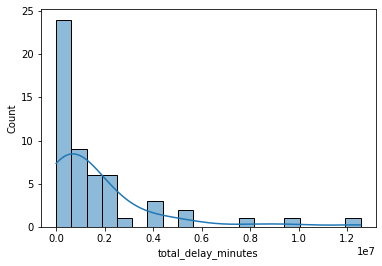

In [29]:
#check for extreme values in total delays
sns.histplot(df_state_total_minutes['total_delay_minutes'], bins=20, kde = True)

## 03. Plotting a Choropleth

In [30]:
# Create a data frame with just the state and the values for total delays 15_minutes_more we want plotted

data_to_plot = df_state_total_delays[['state', 'total_delays']]
data_to_plot.head(25)

,state,total_delays
0,Alabama,7582
1,Alaska,11053
2,Arizona,44233
3,Arkansas,5488
4,California,136448
5,Colorado,76325
6,Connecticut,6012
7,Delaware,27
8,Florida,155934
9,Georgia,60571


In [31]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [50, -90], zoom_start = 2.5)


folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['state', 'total_delays'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Count Arrivals Delayed 15 Minutes or more").add_to(map)
folium.LayerControl().add_to(map)

map

In [32]:
# Create a data frame with just the state and the values for total delay minutes

data_to_plot2 = df_state_total_minutes[['state', 'total_delay_minutes']]
data_to_plot2.head(25)

,state,total_delay_minutes
0,Alabama,469758
1,Alaska,511838
2,Arizona,3000654
3,Arkansas,309900
4,California,8069900
5,Colorado,5163716
6,Connecticut,364797
7,Delaware,1521
8,Florida,9745403
9,Georgia,4109553


In [33]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [50, -90], zoom_start = 2.5)


folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot2,
    columns = ['state', 'total_delay_minutes'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total Arrival Delay Minutes").add_to(map)
folium.LayerControl().add_to(map)

map

The analysis does not answer any of my current research quetions but it does let me know that Florida, Texas, and California has the most arrivals delayed 15 minutes or more/highest arrival delay minutes and majority of the states have less than 30,951 arrivals delayed 15 minutes or more and less than 2.1 mil delay minutes. The analysis leads me to want to know more about how many airports are in each state to help answer if airline locations influence delay time. Since those states are larger and most likely have more airports than others states it is hard to say what influence airport location has delay time.